<a href="https://colab.research.google.com/github/123danghi/ML_Internship_Task-JTEKT-/blob/main/SalesPredictionDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Average amount spent on TV advertising: 147.0425
Correlation between radio advertising expenditure and product sales: 0.3496507429302875
Advertising medium with the highest impact on sales: TV


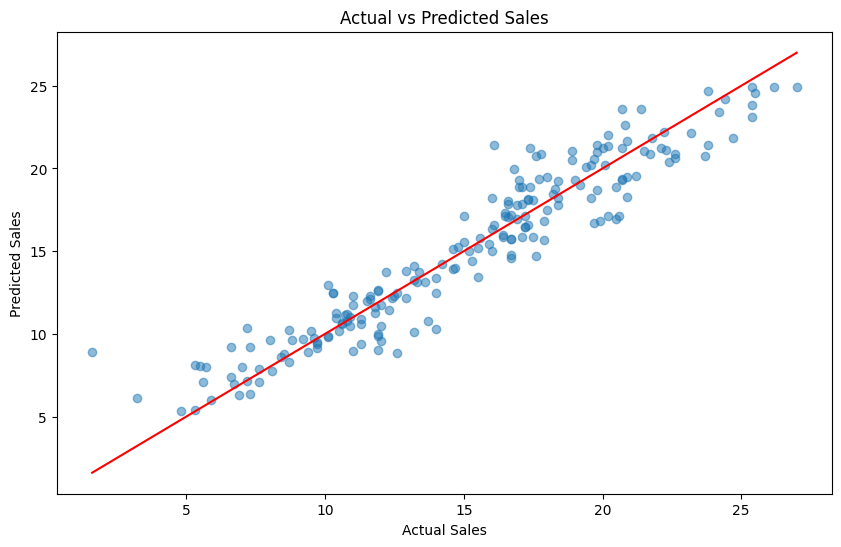

Mean Squared Error: 2.705558930270712
R-squared: 0.9026073885519157
Predicted sales for $200 on TV, $40 on Radio, and $50 on Newspaper: 19.81151092944479


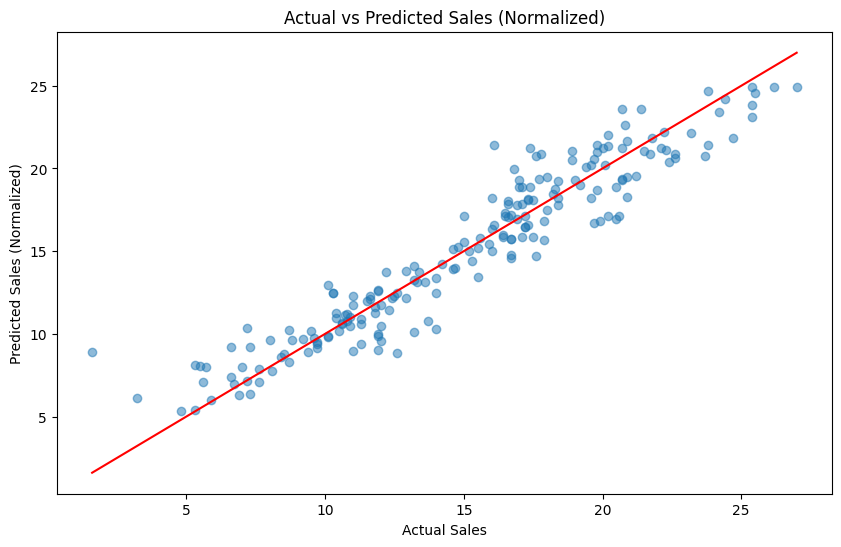

Mean Squared Error (Normalized): 2.705558930270712
R-squared (Normalized): 0.9026073885519157


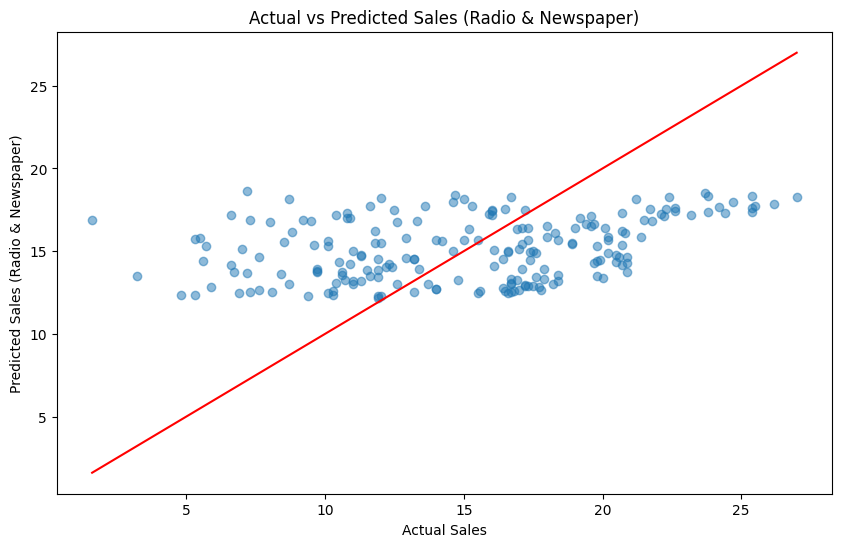

Mean Squared Error (Radio & Newspaper): 24.346722570841717
R-squared (Radio & Newspaper): 0.12358556864291459


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/sample_data/advertising_sales_data.xlsx'
data = pd.read_excel(file_path)

# Fill missing values with the mean of the respective columns (excluding 'Campaign')
data.fillna(data.drop(columns=['Campaign']).mean(), inplace=True)

# 1. Average amount spent on TV advertising
average_tv_spent = data['TV'].mean()
print('Average amount spent on TV advertising:', average_tv_spent)

# 2. Correlation between radio advertising expenditure and product sales
correlation_radio_sales = data['Radio'].corr(data['Sales'])
print('Correlation between radio advertising expenditure and product sales:', correlation_radio_sales)

# 3. Identify the advertising medium with the highest impact on sales
# Select only numeric columns for correlation computation
numeric_data = data.select_dtypes(include=[float, int])
correlations = numeric_data.corr()['Sales'].drop('Sales')
highest_impact_medium = correlations.idxmax()
print('Advertising medium with the highest impact on sales:', highest_impact_medium)

# 4. Plot a linear regression line including all variables to predict Sales
# Prepare the data
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot the predictions against the actual sales values
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # Identity line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Print model performance metrics
print('Mean Squared Error:', mean_squared_error(y, predictions))
print('R-squared:', r2_score(y, predictions))

# 5. Predict sales for new advertising expenditures
new_data = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [50]})
predicted_sales = model.predict(new_data)
print('Predicted sales for $200 on TV, $40 on Radio, and $50 on Newspaper:', predicted_sales[0])

# 6. Normalize the dataset and compare model performance
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Initialize and fit the linear regression model on normalized data
model_normalized = LinearRegression()
model_normalized.fit(X_normalized, y)

# Make predictions on normalized data
predictions_normalized = model_normalized.predict(X_normalized)

# Plot the predictions against the actual sales values for normalized data
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions_normalized, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # Identity line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales (Normalized)')
plt.title('Actual vs Predicted Sales (Normalized)')
plt.show()

# Print model performance metrics for normalized data
print('Mean Squared Error (Normalized):', mean_squared_error(y, predictions_normalized))
print('R-squared (Normalized):', r2_score(y, predictions_normalized))

# 7. Impact on sales prediction using only radio and newspaper advertising expenditures
X_radio_newspaper = data[['Radio', 'Newspaper']]

# Initialize and fit the linear regression model
model_radio_newspaper = LinearRegression()
model_radio_newspaper.fit(X_radio_newspaper, y)

# Make predictions
predictions_radio_newspaper = model_radio_newspaper.predict(X_radio_newspaper)

# Plot the predictions against the actual sales values
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions_radio_newspaper, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # Identity line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales (Radio & Newspaper)')
plt.title('Actual vs Predicted Sales (Radio & Newspaper)')
plt.show()

# Print model performance metrics
print('Mean Squared Error (Radio & Newspaper):', mean_squared_error(y, predictions_radio_newspaper))
print('R-squared (Radio & Newspaper):', r2_score(y, predictions_radio_newspaper))
